In [1]:
# standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sqlite3
from collections import Counter
from tqdm.autonotebook import tqdm
import warnings

# processing and pre-processing imports
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.exceptions import DataConversionWarning
from sklearn.exceptions import ConvergenceWarning

# ml model selection imports
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

# ml models
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.svm import LinearSVC, SVC, SVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
import xgboost as xgb

import machumachine

# metric computation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report

C:\Users\jedda\Anaconda3\lib\site-packages\tqdm\autonotebook\__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


In [2]:
df = pd.read_pickle('cleaned_data.pkl')
df.head()

,actors,composer,directors,domestic_revenue,franchise,genres,link,prod_budget,producers,rating,release_date,runtime,studio,title,worldwide_revenue,writers,actor_level,director_level,res,theaters
0,"Robert Downey, Jr., Chris Hemsworth, Mark Ruff...",Alan Silvestri,"Joe Russo, Anthony Russo",8.5741e+08,1,Action / Adventure,/movies/?id=marvel2019.htm,3.56e+08,Kevin Feige,PG-13,2019-04-26,181,Buena Vista,Avengers: Endgame,2.7945e+09,"Christopher Markus, Stephen McFeely",163,8,"(#1 rank, 4,662 theaters, $76,601 average)","4,662"
4,"Tom Holland, Jake Gyllenhaal, Marisa Tomei, Jo...",None,None,3.6033e+08,1,Action / Adventure,/movies/?id=spidermanhomecoming2.htm,1.6e+08,None,PG-13,2019-07-02,129,Sony / Columbia,Spider-Man: Far from Home,1.0753e+09,None,20,0,"(#1 rank, 4,634 theaters, $19,978 average)","4,634"
5,Will Smith,Alan Menken,Guy Ritchie,3.5037e+08,1,Fantasy,/movies/?id=disneyfairytale22019.htm,1.83e+08,None,PG,2019-05-24,128,Buena Vista,Aladdin (2019),1.0256e+09,None,4,4,"(#1 rank, 4,476 theaters, $20,443 average)","4,476"
6,"Lupita Nyong'o, Elisabeth Moss",None,Jordan Peele,1.7501e+08,0,Thriller,/movies/?id=untitledjordanpeele.htm,2e+07,"Jordan Peele, Jason Blum",R,2019-03-22,116,Universal,Us,2.5466e+08,Jordan Peele,6,4,"(#1 rank, 3,741 theaters, $19,010 average)","3,741"
8,"Jay Baruchel, America Ferrera, Cate Blanchett,...",None,Dean DeBlois,1.608e+08,1,Animation,/movies/?id=httyd3.htm,1.29e+08,None,PG,2019-02-22,104,Universal,How to Train Your Dragon: The Hidden World,5.1976e+08,None,23,4,"(#1 rank, 4,259 theaters, $12,919 average)","4,259"


In [6]:
df[df.actor_level==1]

,actors,composer,directors,domestic_revenue,franchise,genres,link,prod_budget,producers,rating,release_date,runtime,studio,title,worldwide_revenue,writers,actor_level,director_level,res,theaters
59,Taylor Schilling,None,None,1.4856e+07,0,Horror,/movies/?id=theprodigy.htm,6e+06,None,R,2019-02-08,92,Orion Pictures,The Prodigy,1.4856e+07,None,1,0,"(#6 rank, 2,530 theaters, $2,313 average)","2,530"
144,Leigh Whannell,None,None,6.7745e+07,1,Horror,/movies/?id=insidious4.htm,1e+07,"Jason Blum, Oren Peli, James Wan",PG-13,2018-01-05,103,Universal,Insidious: The Last Key,1.6789e+08,Leigh Whannell,1,0,"(#2 rank, 3,116 theaters, $9,493 average)","3,116"
289,Milla Jovovich,None,Paul W.S. Anderson,2.683e+07,1,Sci-Fi Action,/movies/?id=residentevil6.htm,4e+07,None,R,2017-01-27,106,Sony / Screen Gems,Resident Evil: The Final Chapter,3.1224e+08,Paul W.S. Anderson,1,4,"(#4 rank, 3,104 theaters, $4,382 average)","3,104"
765,Claire Foy,None,Fede Alvarez,1.4841e+07,0,None,/movies/?id=thegirlinthespidersweb.htm,4.3e+07,None,R,2018-11-09,117,Sony / Columbia,The Girl in the Spider's Web: A New Dragon Tat...,3.5165e+07,"Steven Knight, Fede Alvarez",1,4,"(#6 rank, 2,929 theaters, $2,666 average)","2,929"
1527,Alicia Silverstone,None,David Bowers,2.0739e+07,1,Comedy,/movies/?id=diaryofawimpykid4.htm,2.2e+07,Nina Jacobson,PG,2017-05-19,90,Fox,Diary of a Wimpy Kid: The Long Haul,4.0141e+07,None,1,4,"(#6 rank, 3,157 theaters, $2,257 average)","3,157"
2821,Bella Thorne,None,Ari Sandel,3.403e+07,0,Comedy,/movies/?id=duff.htm,8e+06,McG,PG-13,2015-02-20,101,Lionsgate,The DUFF,4.3529e+07,Josh A. Cagan,1,3,"(#5 rank, 2,575 theaters, $4,198 average)","2,575"
3518,Jeremy Sumpter,Brian Tyler,Steven Quale,4.7602e+07,0,Thriller,/movies/?id=intothestorm.htm,5e+07,Todd Garner,PG-13,2014-08-08,89,Warner Bros. (New Line),Into The Storm,1.617e+08,John Swetnam,1,3,"(#3 rank, 3,434 theaters, $5,051 average)","3,434"
3549,Ethan Hawke,None,Richard Linklater,2.5352e+07,0,Drama,/movies/?id=boyhood.htm,4e+06,"Richard Linklater, John Sloss",R,2014-07-11,166,IFC,Boyhood,4.4495e+07,Richard Linklater,1,4,"(#11 rank, 771 theaters, $2,584 average)",771
4281,Ashley Bell,Michael Wandmacher,Ed Gass-Donnelly,1.5179e+07,1,Horror,/movies/?id=lastexorcism2.htm,5e+06,"Marc Abraham, Eric Newman, Eli Roth",PG-13,2013-03-01,88,CBS Films,The Last Exorcism Part II,1.5179e+07,"Damien Chazelle, Ed Gass-Donnelly",1,2,"(#5 rank, 2,700 theaters, $2,862 average)","2,700"
4290,Chris Brown,Christopher Lennertz,Benson Lee,8.8884e+06,0,Drama,/movies/?id=planetbboy3d.htm,2e+07,"Beau Flynn, Will Packer",PG-13,2013-09-20,109,Sony / Screen Gems,Battle of the Year,1.6549e+07,"Brin Hill, Benson Lee, Chris Parker",1,2,"(#5 rank, 2,008 theaters, $2,292 average)","2,008"


In [60]:
import sqlite3
conn = sqlite3.connect('movies.db')
df2 = pd.read_sql('select * from moves', conn)
df2.head()

,actors,composer,directors,domestic_revenue,franchise,genres,link,prod_budget,producers,rating,release_date,runtime,studio,title,worldwide_revenue,writers,actor_level,director_level
0,"Robert Downey, Jr., Chris Hemsworth, Mark Ruff...",Alan Silvestri,"Joe Russo, Anthony Russo",857409335,1,Action / Adventure,/movies/?id=marvel2019.htm,356000000,Kevin Feige,PG-13,2019-04-26,181,Buena Vista,Avengers: Endgame,2794509335,"Christopher Markus, Stephen McFeely",163,8
1,"Donald Glover, James Earl Jones, Beyonce Knowl...",Hans Zimmer,Jon Favreau,430889078,1,Action / Adventure,/movies/?id=lionkingliveaction.htm,None,"Jon Favreau, Jeffrey Silver",PG,2019-07-19,118,Buena Vista,The Lion King (2019),1195789078,None,20,4
2,"Brie Larson, Samuel L. Jackson, Ben Mendelsohn...",None,"Anna Boden, Ryan Fleck",426829839,1,Action / Adventure,/movies/?id=marvel2018a.htm,None,Kevin Feige,PG-13,2019-03-08,128,Buena Vista,Captain Marvel,1128274794,None,32,8
3,"Tom Hanks, Tim Allen, Jordan Peele, Keanu Reeves",Randy Newman,Josh Cooley,410050743,1,Animation,/movies/?id=pixar2017.htm,None,Jonas Rivera,G,2019-06-21,100,Buena Vista,Toy Story 4,959250743,None,16,4
4,"Tom Holland, Jake Gyllenhaal, Marisa Tomei, Jo...",None,None,360328925,1,Action / Adventure,/movies/?id=spidermanhomecoming2.htm,160000000,None,PG-13,2019-07-02,129,Sony / Columbia,Spider-Man: Far from Home,1075328925,None,20,0


In [61]:
df = pd.read_pickle('cleaned_data.pkl')
df = df.drop(['res','composer', 'link','writers',
              'producers', 'worldwide_revenue'],axis=1).copy()
df.dropna(subset=['genres','release_date','theaters'], inplace=True)
df['runtime'] = df['runtime'].fillna(int(df['runtime'].mean()))
df['profit'] = df['domestic_revenue'] - df['prod_budget']
df['month'] = [i.month for i in df['release_date']]
df['year'] = [i.year for i in df['release_date']]
df = df[df['year']>2009]

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 6472
Data columns (total 17 columns):
actors              883 non-null object
directors           790 non-null object
domestic_revenue    981 non-null float64
franchise           981 non-null int64
genres              981 non-null object
prod_budget         981 non-null float64
rating              981 non-null object
release_date        981 non-null datetime64[ns]
runtime             981 non-null float64
studio              981 non-null object
title               981 non-null object
actor_level         981 non-null int64
director_level      981 non-null int64
theaters            981 non-null float64
profit              981 non-null float64
month               981 non-null int64
year                981 non-null int64
dtypes: datetime64[ns](1), float64(5), int64(5), object(6)
memory usage: 138.0+ KB


In [63]:
df['roi'] = df['profit']/df['prod_budget']
df['category'] = df['roi'].apply(lambda x: 0 if x < 0 else (1 if x < 3 else 2))

In [64]:
Counter(df['category'])

Counter({1: 463, 2: 121, 0: 397})

In [65]:
machumachine.pcc(df['category'])

(40.17, 50.22)

In [66]:
dummy = df.drop(['domestic_revenue', 'release_date', 'title', 'actors', 'directors', 'profit', 'category', 'year', 'roi'],axis=1).copy()
X = pd.get_dummies(dummy, drop_first=True)
target = df['category']

In [67]:
dummy.columns

Index(['franchise', 'genres', 'prod_budget', 'rating', 'runtime', 'studio',
       'actor_level', 'director_level', 'theaters', 'month'],
      dtype='object')

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, target, random_state=1)

In [69]:
model = xgb.XGBClassifier(learning_rate=0.1, n_estimators=200, max_features=3, min_samples_leaf=3)
model.fit(X_train, y_train)
print(model.score(X_test, y_test))
print(classification_report(y_test, model.predict(X_test)))

0.7195121951219512
              precision    recall  f1-score   support

           0       0.78      0.68      0.73       104
           1       0.68      0.77      0.72       114
           2       0.72      0.64      0.68        28

    accuracy                           0.72       246
   macro avg       0.73      0.70      0.71       246
weighted avg       0.73      0.72      0.72       246



In [83]:
X_test.columns

Index(['franchise', 'prod_budget', 'runtime', 'actor_level', 'director_level',
       'theaters', 'month', 'genres_Action / Adventure', 'genres_Action Drama',
       'genres_Action Thriller',
       ...
       'studio_Universal', 'studio_Unknown', 'studio_Vivendi Entertainment',
       'studio_Warner Bros.', 'studio_Warner Bros. (New Line)',
       'studio_Weinstein / Dimension', 'studio_Weinstein Company',
       'studio_Well Go USA', 'studio_Wrekin Hill', 'studio_Yash Raj'],
      dtype='object', length=115)

In [70]:
confusion_matrix(y_test, model.predict(X_test))

array([[71, 33,  0],
       [19, 88,  7],
       [ 1,  9, 18]])

# Run Iterations on GridSearch

In [149]:
def grid_search(model, parameters, X, target, cv=3, random_state=None, scaler=None, return_score=False):
    
    X_train, X_test, y_train, y_test = train_test_split(X, target, random_state=random_state)
    
    if scaler is not None:
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
    gs = GridSearchCV(model, parameters, n_jobs=-1, verbose=8, 
                      cv=StratifiedKFold(n_splits=cv, shuffle=True)).fit(X_train, y_train)
    if return_score:
        return gs, gs.score(X_test, y_test)
    else:
        return gs

In [150]:
param_dict = {'knn':{'n_neighbors':range(1,30)},
             'linearsvcl1':{'penalty':['l1',], 'C':[0.001,0.01,0.1,0.5,1,10,100],'loss':['squared_hinge',],
                           'dual':[False,]},
              'linearsvcl2':{'penalty':['l2',], 'C':[0.001,0.01, 0.1, 0.5, 1, 10, 100]},
              'logisticregression':{'penalty':['l1', 'l2'], 'C':[0.001,0.01, 0.1, 0.5, 1, 10, 100]},
              'svcrbf':{'kernel':['rbf',], 'gamma':[0.01, 0.1, 0.5, 1], 'coef0':[2,3]},
              'decisiontree': {'max_depth':[2,4,6], 'max_features':[3,4,5]},
             'randomforest':{'max_depth':[2,3,6], 'max_features':[3,4,5], 'n_estimators':[200,400,600,800], 'n_jobs':[-1]},
             'gbm':{'learning_rate':[0.1,0.5,0.2,0.01], 'n_estimators':[100,200,400,600], 'min_samples_leaf':[3,4,5],'max_features':[3,4,5]},
             'xgb':{'learning_rate':[0.1,], 'n_estimators':[100,200,], 'min_samples_leaf':[3,],'max_features':[3,]},
            }

In [156]:
all_models = [KNeighborsClassifier(), LinearSVC(), LinearSVC(), LogisticRegression(), 
              SVC(), DecisionTreeClassifier(), RandomForestClassifier(), 
             GradientBoostingClassifier(), xgb.XGBClassifier()]
models = []
accuracy = []

for i in tqdm(range(len(param_dict.keys()))):
    print(list(param_dict.keys())[i])
    model, score = grid_search(all_models[i], param_dict[list(param_dict.keys())[i]], 
                X=X, target=target, random_state=1, return_score=True)
    
    models.append(model)
    accuracy.append(score)
    print(score)

knn
Fitting 3 folds for each of 29 candidates, totalling 87 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  87 out of  87 | elapsed:    0.5s finished
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of  21 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   6 out of  21 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   9 out of  21 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  12 out of  21 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  15

0.5528455284552846
linearsvcl1
Fitting 3 folds for each of 7 candidates, totalling 21 fits
0.6666666666666666
linearsvcl2
Fitting 3 folds for each of 7 candidates, totalling 21 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done   6 out of  21 | elapsed:    0.1s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done   9 out of  21 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  12 out of  21 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  15 out of  21 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    0.4s finished
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   9 out of  42 | ela

0.11382113821138211
logisticregression
Fitting 3 folds for each of 14 candidates, totalling 42 fits


[Parallel(n_jobs=-1)]: Done  21 out of  42 | elapsed:    0.7s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  42 out of  42 | elapsed:    1.9s finished
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done   5 out of  24 | elapsed:    0.1s remaining:    0.4s


0.6666666666666666
svcrbf
Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Done   9 out of  24 | elapsed:    0.2s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  13 out of  24 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of  27 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   8 out of  27 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  12 out of  27 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  16 out of  27 | elapsed:    0.0s remaining:    0.0s


0.483739837398374
decisiontree
Fitting 3 folds for each of 9 candidates, totalling 27 fits
0.4878048780487805
randomforest
Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:   15.7s finished


0.5813008130081301
gbm
Fitting 3 folds for each of 144 candidates, totalling 432 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:   12.3s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   18.2s
[Parallel(n_jobs=-1)]: Done 205 tasks      | elapsed:   26.8s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:   34.3s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   42.9s
[Parallel(n_jobs=-1)]: Done 432 out of 432 | elapsed:   52.6s finished


0.6626016260162602
xgb
Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   6 | elapsed:    1.2s remaining:    2.4s
[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    1.2s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done   4 out of   6 | elapsed:    2.0s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    2.1s finished


0.7195121951219512



In [158]:
res = pd.DataFrame([[i.best_estimator_ for i in models], accuracy, models]).transpose()
res.columns = ['model', 'accuracy', 'model_object']
res

,model,accuracy,model_object
0,"KNeighborsClassifier(algorithm='auto', leaf_si...",0.55285,"GridSearchCV(cv=StratifiedKFold(n_splits=3, ra..."
1,"LinearSVC(C=0.1, class_weight=None, dual=False...",0.66667,"GridSearchCV(cv=StratifiedKFold(n_splits=3, ra..."
2,"LinearSVC(C=100, class_weight=None, dual=True,...",0.11382,"GridSearchCV(cv=StratifiedKFold(n_splits=3, ra..."
3,"LogisticRegression(C=1, class_weight=None, dua...",0.66667,"GridSearchCV(cv=StratifiedKFold(n_splits=3, ra..."
4,"SVC(C=1.0, cache_size=200, class_weight=None, ...",0.48374,"GridSearchCV(cv=StratifiedKFold(n_splits=3, ra..."
5,"DecisionTreeClassifier(class_weight=None, crit...",0.4878,"GridSearchCV(cv=StratifiedKFold(n_splits=3, ra..."
6,"(DecisionTreeClassifier(class_weight=None, cri...",0.5813,"GridSearchCV(cv=StratifiedKFold(n_splits=3, ra..."
7,([DecisionTreeRegressor(criterion='friedman_ms...,0.6626,"GridSearchCV(cv=StratifiedKFold(n_splits=3, ra..."
8,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.71951,"GridSearchCV(cv=StratifiedKFold(n_splits=3, ra..."


In [114]:
models[-1].best_params_

{'learning_rate': 0.1,
 'max_features': 3,
 'min_samples_leaf': 3,
 'n_estimators': 100}

In [154]:
Counter(dummy['genres']).most_common(2)

[('Comedy', 161), ('Drama', 136)]

In [192]:
comedy = df[df['genres']=='Comedy'].drop(['domestic_revenue', 'genres', 'release_date', 'profit', 'year', 'roi'],axis=1)
drama = df[df['genres']=='Drama'].drop(['domestic_revenue', 'genres', 'release_date', 'profit', 'year', 'roi'],axis=1)

In [201]:
Xc = pd.get_dummies(comedy.drop(['category'],axis=1))
yc = comedy['category']
Xd = pd.get_dummies(drama.drop(['category'],axis=1))
yd = drama['category']

In [205]:
all_models = [KNeighborsClassifier(), LinearSVC(), LinearSVC(), LogisticRegression(), 
              SVC(), DecisionTreeClassifier(), RandomForestClassifier(), 
             GradientBoostingClassifier(), xgb.XGBClassifier()]
modelsc = []
accuracyc = []

for i in tqdm(range(len(param_dict.keys()))):
    print(list(param_dict.keys())[i])
    model, score = grid_search(all_models[i], param_dict[list(param_dict.keys())[i]], 
                X=Xc, target=yc, random_state=1, return_score=True, scaler=RobustScaler())
    
    modelsc.append(model)
    accuracyc.append(score)
    print(score)
resc = pd.DataFrame([[i.best_estimator_ for i in modelsc], accuracyc, modelsc]).transpose()
resc.columns = ['model', 'accuracy', 'model_object']
resc

knn
Fitting 3 folds for each of 29 candidates, totalling 87 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done  50 out of  87 | elapsed:    2.8s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done  72 out of  87 | elapsed:    2.8s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  87 out of  87 | elapsed:    2.8s finished
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of  21 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   6 out of  21 | elaps

0.5609756097560976
linearsvcl1
Fitting 3 folds for each of 7 candidates, totalling 21 fits
0.5365853658536586
linearsvcl2
Fitting 3 folds for each of 7 candidates, totalling 21 fits
0.4878048780487805
logisticregression
Fitting 3 folds for each of 14 candidates, totalling 42 fits


[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    0.1s finished
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of  21 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   6 out of  21 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   9 out of  21 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  12 out of  21 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  15 out of  21 | elapsed:    0.0s remaining:    0.0s
[Parall

0.5121951219512195
svcrbf
Fitting 3 folds for each of 8 candidates, totalling 24 fits
0.4878048780487805
decisiontree
Fitting 3 folds for each of 9 candidates, totalling 27 fits
0.43902439024390244
randomforest
Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Done  13 out of  24 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of  27 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   8 out of  27 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  12 out of  27 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  16 out of  27 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:    0.0s finished
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=

0.5121951219512195
gbm
Fitting 3 folds for each of 144 candidates, totalling 432 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:   10.8s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   15.0s
[Parallel(n_jobs=-1)]: Done 205 tasks      | elapsed:   19.9s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:   26.3s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   34.5s
[Parallel(n_jobs=-1)]: Done 432 out of 432 | elapsed:   43.5s finished
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


0.5853658536585366
xgb
Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   6 | elapsed:    0.2s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done   4 out of   6 | elapsed:    0.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.4s finished
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


0.6097560975609756


,model,accuracy,model_object
0,"KNeighborsClassifier(algorithm='auto', leaf_si...",0.56098,"GridSearchCV(cv=StratifiedKFold(n_splits=3, ra..."
1,"LinearSVC(C=0.5, class_weight=None, dual=False...",0.53659,"GridSearchCV(cv=StratifiedKFold(n_splits=3, ra..."
2,"LinearSVC(C=0.01, class_weight=None, dual=True...",0.4878,"GridSearchCV(cv=StratifiedKFold(n_splits=3, ra..."
3,"LogisticRegression(C=1, class_weight=None, dua...",0.5122,"GridSearchCV(cv=StratifiedKFold(n_splits=3, ra..."
4,"SVC(C=1.0, cache_size=200, class_weight=None, ...",0.4878,"GridSearchCV(cv=StratifiedKFold(n_splits=3, ra..."
5,"DecisionTreeClassifier(class_weight=None, crit...",0.43902,"GridSearchCV(cv=StratifiedKFold(n_splits=3, ra..."
6,"(DecisionTreeClassifier(class_weight=None, cri...",0.5122,"GridSearchCV(cv=StratifiedKFold(n_splits=3, ra..."
7,([DecisionTreeRegressor(criterion='friedman_ms...,0.58537,"GridSearchCV(cv=StratifiedKFold(n_splits=3, ra..."
8,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.60976,"GridSearchCV(cv=StratifiedKFold(n_splits=3, ra..."


In [206]:
all_models = [KNeighborsClassifier(), LinearSVC(), LinearSVC(), LogisticRegression(), 
              SVC(), DecisionTreeClassifier(), RandomForestClassifier(), 
             GradientBoostingClassifier(), xgb.XGBClassifier()]
modelsd = []
accuracyd = []

for i in tqdm(range(len(param_dict.keys()))):
    print(list(param_dict.keys())[i])
    model, score = grid_search(all_models[i], param_dict[list(param_dict.keys())[i]], 
                X=Xd, target=yd, random_state=1, return_score=True, scaler=RobustScaler())
    
    modelsd.append(model)
    accuracyd.append(score)
    print(score)
resd = pd.DataFrame([[i.best_estimator_ for i in modelsd], accuracyd, modelsd]).transpose()
resd.columns = ['model', 'accuracy', 'model_object']
resd

knn
Fitting 3 folds for each of 29 candidates, totalling 87 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   6 out of  87 | elapsed:    0.0s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  87 out of  87 | elapsed:    0.2s finished
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of  21 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   6 out of  21 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   9 out of  21 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  12

0.47058823529411764
linearsvcl1
Fitting 3 folds for each of 7 candidates, totalling 21 fits
0.4117647058823529
linearsvcl2
Fitting 3 folds for each of 7 candidates, totalling 21 fits
0.4411764705882353
logisticregression
Fitting 3 folds for each of 14 candidates, totalling 42 fits


[Parallel(n_jobs=-1)]: Done  15 out of  42 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  42 out of  42 | elapsed:    0.2s finished
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tas

0.5
svcrbf
Fitting 3 folds for each of 8 candidates, totalling 24 fits
0.38235294117647056
decisiontree
Fitting 3 folds for each of 9 candidates, totalling 27 fits
0.38235294117647056
randomforest
Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Done   9 out of  24 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  13 out of  24 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:    0.0s finished
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of  27 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   8 out of  27 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  12 out of  27 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  16 out of  27 | elapsed:    0.0s remaining:    0.0s
[Parall

0.5
gbm
Fitting 3 folds for each of 144 candidates, totalling 432 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:    9.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   13.8s
[Parallel(n_jobs=-1)]: Done 205 tasks      | elapsed:   18.7s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:   24.6s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   31.5s
[Parallel(n_jobs=-1)]: Done 432 out of 432 | elapsed:   39.4s finished
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


0.5
xgb
Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   6 | elapsed:    0.2s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done   4 out of   6 | elapsed:    0.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.3s finished
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


0.5


,model,accuracy,model_object
0,"KNeighborsClassifier(algorithm='auto', leaf_si...",0.47059,"GridSearchCV(cv=StratifiedKFold(n_splits=3, ra..."
1,"LinearSVC(C=0.1, class_weight=None, dual=False...",0.41176,"GridSearchCV(cv=StratifiedKFold(n_splits=3, ra..."
2,"LinearSVC(C=0.01, class_weight=None, dual=True...",0.44118,"GridSearchCV(cv=StratifiedKFold(n_splits=3, ra..."
3,"LogisticRegression(C=0.5, class_weight=None, d...",0.5,"GridSearchCV(cv=StratifiedKFold(n_splits=3, ra..."
4,"SVC(C=1.0, cache_size=200, class_weight=None, ...",0.38235,"GridSearchCV(cv=StratifiedKFold(n_splits=3, ra..."
5,"DecisionTreeClassifier(class_weight=None, crit...",0.38235,"GridSearchCV(cv=StratifiedKFold(n_splits=3, ra..."
6,"(DecisionTreeClassifier(class_weight=None, cri...",0.5,"GridSearchCV(cv=StratifiedKFold(n_splits=3, ra..."
7,([DecisionTreeRegressor(criterion='friedman_ms...,0.5,"GridSearchCV(cv=StratifiedKFold(n_splits=3, ra..."
8,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.5,"GridSearchCV(cv=StratifiedKFold(n_splits=3, ra..."


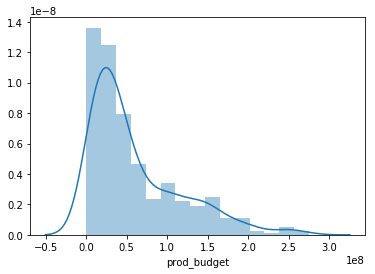

In [220]:
sns.distplot(df[df['category']==0]['prod_budget'])

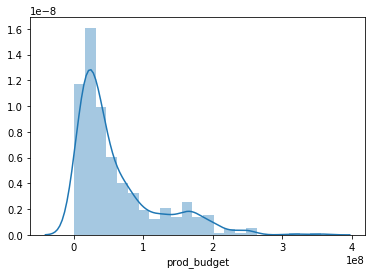

In [219]:
sns.distplot(df[df['category']==1]['prod_budget'])

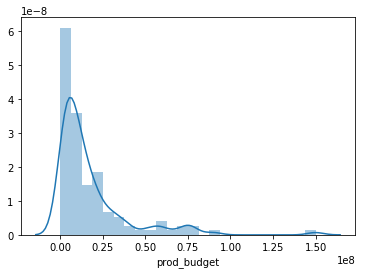

In [221]:
sns.distplot(df[df['category']==2]['prod_budget'])

In [225]:
df.groupby('director_level')['profit'].mean().reset_index()

,director_level,profit
0,0,1.0547e+07
1,1,-8.4411e+06
2,2,-4.5563e+06
3,3,3.1847e+06
4,4,3.254e+07
5,5,-6.1538e+07
6,6,1.1442e+07
7,7,-4.3924e+07
8,8,6.1753e+07
9,12,1.9776e+08


In [226]:
for i in np.argsort(model.feature_importances_)[::-1]:
        print(X.columns[i], model.feature_importances_[i])

theaters 0.059744123
prod_budget 0.048783872
franchise 0.04595904
genres_Thriller 0.04002892
rating_R 0.038883638
director_level 0.03332414
genres_Horror 0.0322342
actor_level 0.031273276
studio_Universal 0.030204566
rating_PG 0.030103799
genres_Animation 0.028966904
month 0.027581034
genres_Comedy 0.027295997
studio_Sony / Columbia 0.026814144
studio_Fox 0.02664297
studio_Paramount 0.02357904
studio_STX Entertainment 0.02274991
genres_Musical 0.022632275
studio_Warner Bros. (New Line) 0.02217415
runtime 0.022158343
studio_Buena Vista 0.022076257
genres_Sci-Fi Action 0.019118555
studio_Lionsgate 0.019076878
studio_Roadside Attractions 0.017798932
rating_PG-13 0.0176391
studio_IFC 0.01747228
genres_Comedy / Drama 0.016631134
studio_Weinstein Company 0.015776517
genres_Sci-Fi Adventure 0.015191802
genres_Music Drama 0.013811084
studio_TriStar 0.013642071
studio_Sony / Screen Gems 0.01316086
studio_Focus Features 0.01307434
genres_Sci-Fi Horror 0.012774653
genres_Action / Adventure 0.0122

In [236]:
df.groupby('category')[['theaters', 'prod_budget', 'franchise']].mean()

,theaters,prod_budget,franchise
category,,,
0,"2,307.5",6.0207e+07,0.12846
1,"3,034.8",6.054e+07,0.2743
2,"2,650.8",1.7672e+07,0.36364


Text(0.5, 1.0, 'Distribution of Theaters')

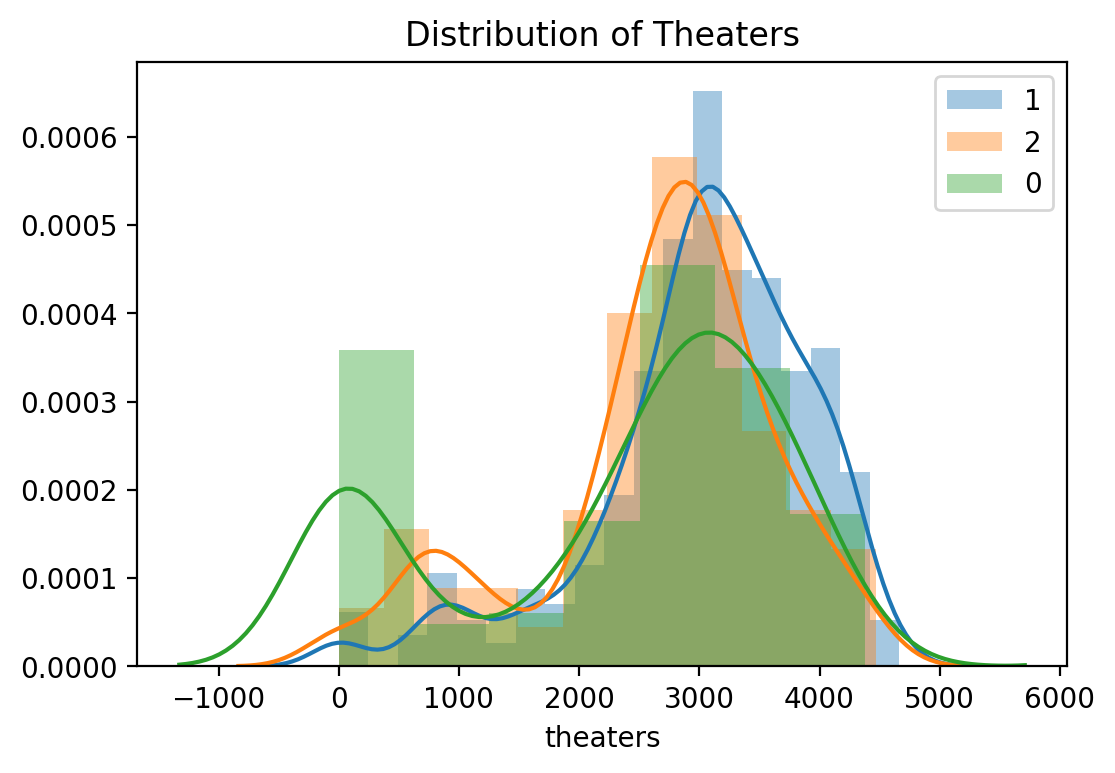

In [241]:
fig, ax = plt.subplots(dpi=200)
for i in df['category'].unique():
    sns.distplot(df[df['category']==i]['theaters'], label=i, ax=ax)
ax.legend()
ax.set_title('Distribution of Theaters')

In [270]:
print(df.groupby('category')['prod_budget'].mean().reset_index()['prod_budget'].to_list())

[60206599.49622166, 60539956.803455725, 17671900.82644628]


Text(0.5, 1.0, 'Distribution of Prod Budget (Log Scale)')

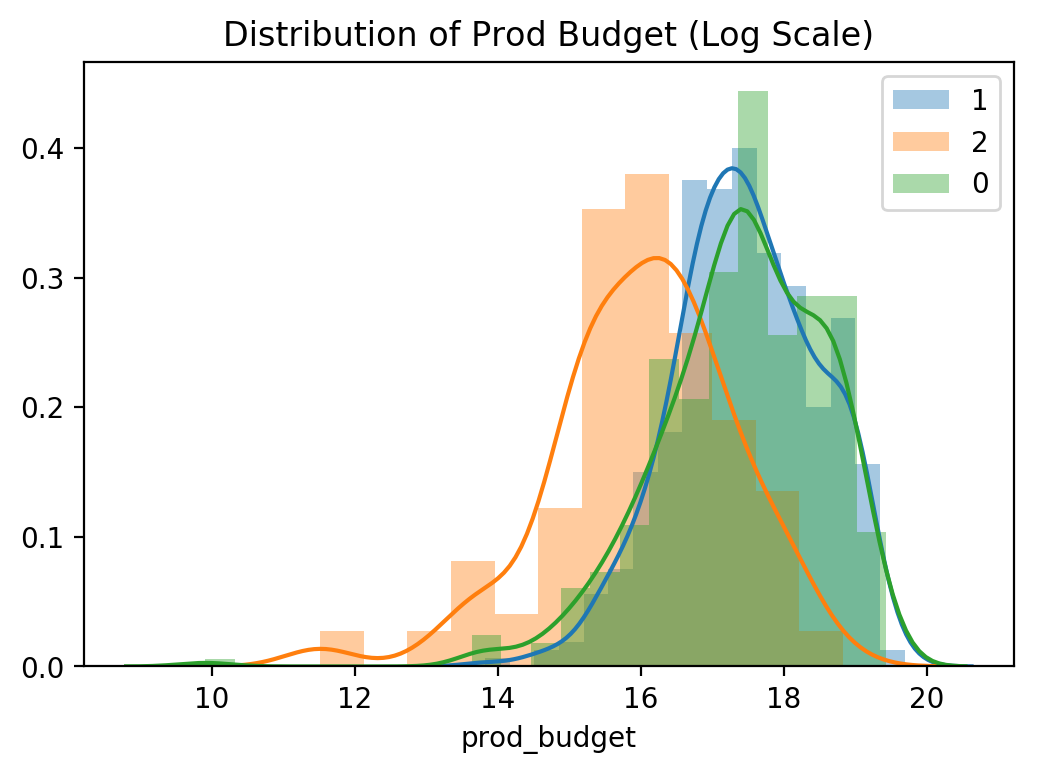

In [244]:
fig, ax = plt.subplots(dpi=200)
for i in df['category'].unique():
    sns.distplot(np.log(df[df['category']==i]['prod_budget']), label=i, ax=ax)
ax.legend()
ax.set_title('Distribution of Prod Budget (Log Scale)')

In [249]:
for i in df['category'].unique():
    print(i, Counter(df[df['category']==i]['franchise']))


1 Counter({0: 336, 1: 127})
2 Counter({0: 77, 1: 44})
0 Counter({0: 346, 1: 51})


In [273]:
print(f'0: {51/(51+346)}')
print(f'1: {127/(127+336)}')
print(f'2: {44/(77+44)}')

0: 0.12846347607052896
1: 0.27429805615550756
2: 0.36363636363636365


In [253]:
for i in df['category'].unique():
    print(i, Counter(df[df['category']==i]['genres']).most_common(), '\n')

1 [('Comedy', 96), ('Animation', 50), ('Drama', 49), ('Action / Adventure', 41), ('Horror', 32), ('Thriller', 22), ('Action', 19), ('Comedy / Drama', 17), ('Romantic Comedy', 16), ('Romance', 13), ('Sci-Fi Action', 11), ('Action Thriller', 10), ('Fantasy', 9), ('Musical', 9), ('Family', 8), ('Crime Drama', 8), ('Sci-Fi Thriller', 7), ('Sports Drama', 7), ('Action Drama', 7), ('Family Comedy', 6), ('Sci-Fi Adventure', 4), ('Horror Comedy', 4), ('Music Drama', 4), ('Family Adventure', 3), ('Sci-Fi Fantasy', 3), ('War', 3), ('War Drama', 1), ('Historical Drama', 1), ('Period Drama', 1), ('Fantasy Comedy', 1), ('Sci-Fi Horror', 1)] 

2 [('Horror', 30), ('Drama', 22), ('Comedy', 22), ('Thriller', 18), ('Animation', 5), ('Comedy / Drama', 5), ('Romantic Comedy', 4), ('Action', 2), ('Action / Adventure', 2), ('Romance', 2), ('Crime Drama', 2), ('Music Drama', 1), ('Musical', 1), ('Horror Comedy', 1), ('Sci-Fi Horror', 1), ('Sci-Fi Action', 1), ('Action Drama', 1), ('Historical Drama', 1)] 

0

In [254]:
for i in df['category'].unique():
    print(i, Counter(df[df['category']==i]['rating']).most_common(), '\n')

1 [('PG-13', 205), ('R', 154), ('PG', 98), ('G', 6)] 

2 [('R', 67), ('PG-13', 43), ('PG', 11)] 

0 [('PG-13', 175), ('R', 147), ('PG', 54), ('Unrated', 18), ('G', 2), ('Not Yet Rated', 1)] 



/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


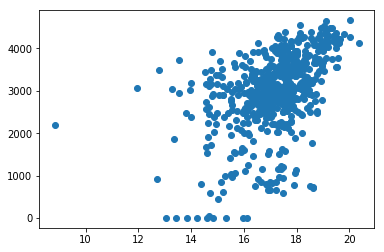

In [264]:
plt.scatter(np.log(df['profit']), df['theaters'])

In [265]:
df.groupby('category')['theaters'].mean()

category
0   2,307.5
1   3,034.8
2   2,650.8
Name: theaters, dtype: float64

In [280]:
cat2 = df[df['category']==2]
cat2.merge(df2, left_on=cat2.index, right_on=df2.index)[['category', 'title', 'profit']]

,category,title,profit
0,2,Us,1.5501e+08
1,2,Glass,9.1035e+07
2,2,Escape Room,4.8006e+07
3,2,The Curse of La Llorona,4.5734e+07
4,2,Ma (2019),4.0373e+07
5,2,The Intruder (2019),2.7419e+07
6,2,Bohemian Rhapsody,1.6443e+08
7,2,A Star is Born (2018),1.7929e+08
8,2,Crazy Rich Asians,1.4453e+08
9,2,Halloween (2018),1.4934e+08


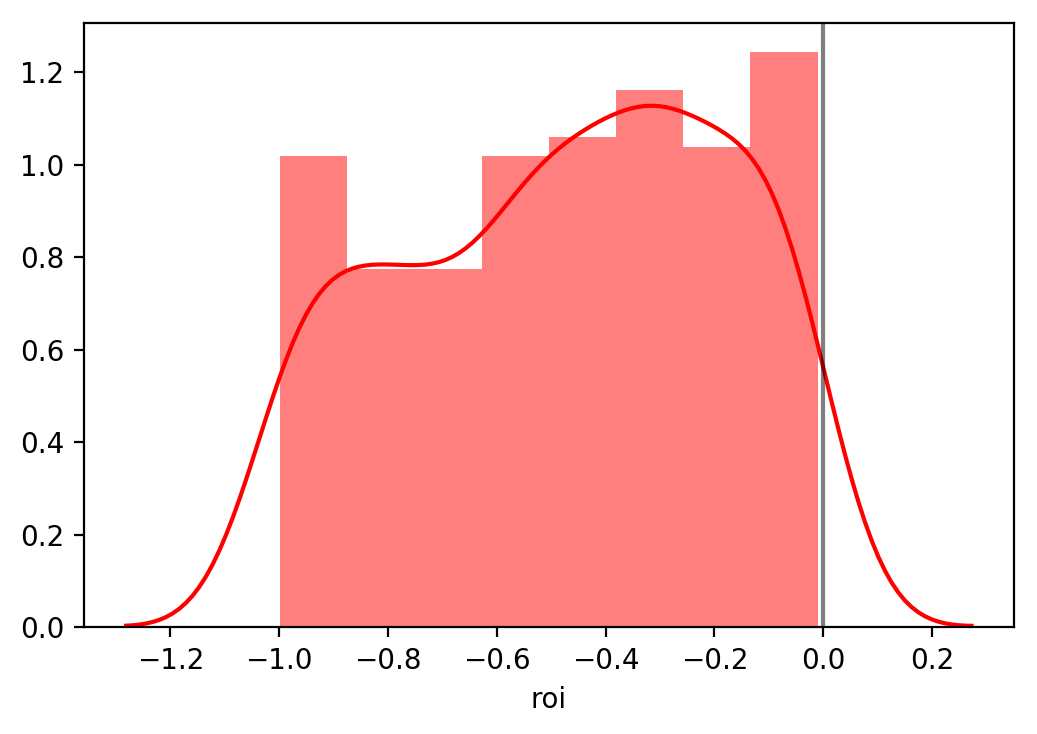

In [121]:
fig, ax = plt.subplots(dpi=200)
sns.distplot(df[df['category']==0]['roi'], ax=ax, color='red', hist_kws={'alpha':0.5})
ax.axvline(0, color='black', alpha=0.5)
fig.savefig('profit categorynloss.png', transparent=True)

In [124]:
actors = pd.read_sql('select * from actors', conn)
directors = pd.read_sql('select * from directors', conn)

In [140]:
actors[actors['actor_level']==4].sort_values('gross', ascending=False).head(20)

,actor,total_gross,num_movies,average,top_movie,gross,actor_level
69,John Boyega,1.655e+09,6,2.758e+08,Star Wars: The Force Awakens,9.367e+08,4
415,Daisy Ridley,1.775e+09,5,3.55e+08,Star Wars: The Force Awakens,9.367e+08,4
469,Andy Serkis,4.3577e+09,26,1.676e+08,Star Wars: The Force Awakens,9.367e+08,4
325,Mark Hamill,2.8263e+09,14,2.019e+08,Star Wars: The Force Awakens,9.367e+08,4
741,Peter Mayhew,1.9974e+09,4,4.994e+08,Star Wars: The Force Awakens,9.367e+08,4
205,Adam Driver,1.6997e+09,13,1.307e+08,Star Wars: The Force Awakens,9.367e+08,4
838,Simon Pegg,2.978e+09,24,1.241e+08,Star Wars: The Force Awakens,9.367e+08,4
808,Lupita Nyong'o,2.9536e+09,8,3.692e+08,Star Wars: The Force Awakens,9.367e+08,4
255,Harrison Ford,5.1196e+09,43,1.191e+08,Star Wars: The Force Awakens,9.367e+08,4
251,Carrie Fisher,2.8906e+09,19,1.521e+08,Star Wars: The Force Awakens,9.367e+08,4


In [146]:
directors[directors['director_level']==1].sort_values('gross', ascending=False).head(100).drop_duplicates()

,director,total_gross,num_movies,average,top_movie,gross,director_level
3683,Christopher Hampton,3.4e+06,3,1.1e+06,Carrington,3.2e+06,1
4154,Rowan Joffe,3.5e+06,2,1.7e+06,Before I Go To Sleep,3.2e+06,1
4153,Jeremy Saulnier,3.5e+06,2,1.7e+06,Green Room,3.2e+06,1
3361,Gillian Robespierre,4.1e+06,2,2e+06,Obvious Child,3.1e+06,1
3364,Andrew Jarecki,3.7e+06,2,1.9e+06,Capturing the Friedmans,3.1e+06,1
3649,Atom Egoyan,6.8e+06,5,1.4e+06,Chloe,3.1e+06,1
3646,John Cameron Mitchell,7.4e+06,4,1.8e+06,Hedwig and the Angry Inch,3.1e+06,1
2599,Damian Szifron,3.1e+06,1,3.1e+06,Wild Tales,3.1e+06,1
3372,Lake Bell,3.2e+06,2,1.6e+06,In a World,3e+06,1
4161,Clark Gregg,2.9e+06,1,2.9e+06,Choke,2.9e+06,1


142240000.0